In [ ]:
import os
kue_lapis_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/datasets/kue/Train/kue_lapis')
kue_putri_salju_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/datasets/kue/Train/kue_putri_salju')
kue_risoles_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/datasets/kue/Train/kue_risoles')

print('total training kue lapis images:', len(os.listdir(kue_lapis_dir)))
print('total training kue putri salju images:', len(os.listdir(kue_putri_salju_dir)))
print('total training kue risoles images:', len(os.listdir(kue_risoles_dir)))

kue_lapis_files = os.listdir(kue_lapis_dir)
print(kue_lapis_files[:10])

kue_putri_salju_files = os.listdir(kue_putri_salju_dir)
print(kue_putri_salju_files[:10])

kue_risoles_files = os.listdir(kue_risoles_dir)
print(kue_risoles_files[:10])

total training kue lapis images: 201
total training kue putri salju images: 174
total training kue risoles images: 196
['124.jpg', '25.jpg', '150.jpg', '122.jpg', '115.jpg', '163.jpg', '177.jpg', '144.jpg', '191.jpg', '26.jpg']
['17.jpg', '153.jpg', '109.jpg', '126.jpg', '101.jpg', '129.jpg', '137.jpg', '122.jpg', '116.jpg', '111.jpg']
['11.jpg', '105.jpg', '111.jpg', '107.jpg', '104.jpg', '123.jpg', '121.jpg', '119.jpg', '117.jpg', '1.jpg']


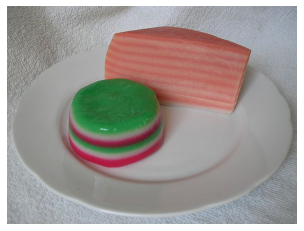

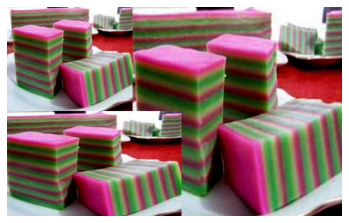

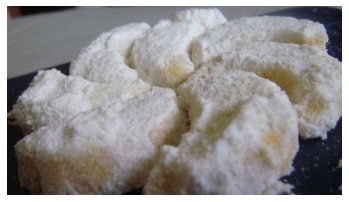

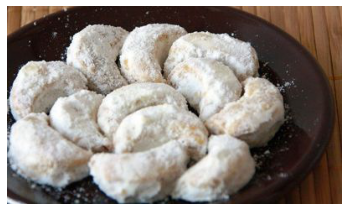

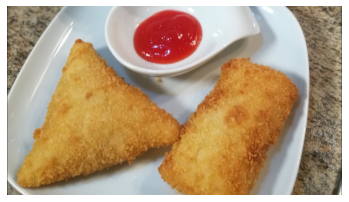

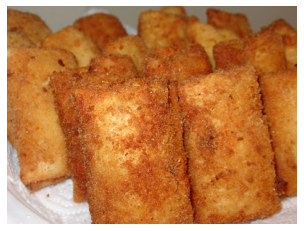

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 12

next_kue_lapis = [os.path.join(kue_lapis_dir, fname) 
                        for fname in kue_lapis_files[pic_index-2:pic_index]]
next_kue_putri_salju = [os.path.join(kue_putri_salju_dir, fname) 
                        for fname in kue_putri_salju_files[pic_index-2:pic_index]]
next_kue_risoles = [os.path.join(kue_risoles_dir, fname) 
                   for fname in kue_risoles_files[pic_index-2:pic_index]]


for i, img_path in enumerate(next_kue_lapis+next_kue_putri_salju+next_kue_risoles):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

print("Loading training data...\t\t", end='')
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/datasets/kue/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
    shuffle=True,
    seed=42,
    batch_size=64
)

print("Loading validation data...\t\t", end='')
VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/datasets/kue/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=16
)

print("Loading test data...\t\t\t", end='')
TEST_DIR = "/content/drive/MyDrive/Colab Notebooks/datasets/kue/test"
test_datagen = ImageDataGenerator(rescale = 1./255)
test_generator = test_datagen.flow_from_directory(
	TEST_DIR,
	target_size=(150,150),
	class_mode='categorical',
    batch_size=16
)

Loading training data...		Found 569 images belonging to 3 classes.
Loading validation data...		Found 60 images belonging to 3 classes.
Loading test data...			Found 58 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping

def callbacks():
    cb = []

    reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss',  
                                       factor=0.5, patience=1, 
                                       verbose=1, mode='min', 
                                       epsilon=0.0001, min_lr=0,
                                       restore_best_weights=True)
    cb.append(reduceLROnPlat)
    
    log = CSVLogger('log.csv')
    cb.append(log)

    es = EarlyStopping(monitor='val_loss', patience=5, verbose=0,
                       mode='min', restore_best_weights=True)
    
    cb.append(es)
    
    return cb

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 32)       0

In [ ]:
import time
start = time.time()

In [ ]:
history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data = validation_generator, 
                    verbose = 1,
                    callbacks = callbacks())

Epoch 1/50
9/9 [==============================] - 29s 3s/step - loss: 0.9895 - accuracy: 0.4148 - val_loss: 0.6163 - val_accuracy: 0.7833 - lr: 0.0010
Epoch 2/50
9/9 [==============================] - 20s 2s/step - loss: 0.7394 - accuracy: 0.6696 - val_loss: 0.5273 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 0.7072 - accuracy: 0.6626
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
9/9 [==============================] - 19s 2s/step - loss: 0.7072 - accuracy: 0.6626 - val_loss: 0.6745 - val_accuracy: 0.6167 - lr: 0.0010
Epoch 4/50
9/9 [==============================] - 20s 2s/step - loss: 0.6792 - accuracy: 0.6696 - val_loss: 0.5053 - val_accuracy: 0.8167 - lr: 5.0000e-04
Epoch 5/50
9/9 [==============================] - ETA: 0s - loss: 0.6598 - accuracy: 0.6696
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
9/9 [==============================] - 19s 2s/step - loss: 0.6598 -

In [ ]:
print("Time elapsed training: ")
end = time.time()
print("{} second".format(end - start))

Time elapsed training: 
918.0778713226318 second


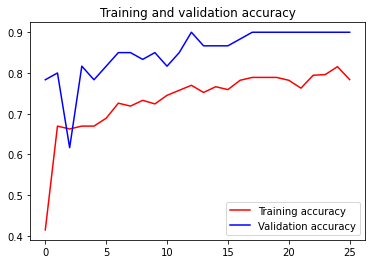

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
results = model.evaluate(test_generator)

4/4 [==============================] - 14s 5s/step - loss: 0.3902 - accuracy: 0.8966


In [ ]:
print('test loss, test acc:', results)

test loss, test acc: [0.39019519090652466, 0.8965517282485962]


In [ ]:
print(train_generator.class_indices)

{'kue_lapis': 0, 'kue_putri_salju': 1, 'kue_risoles': 2}


Saving 13.jpg to 13.jpg
0
kue lapis


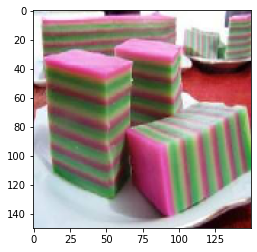

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(output_class)
  if output_class==0:
    print('kue lapis')
  elif output_class==1:
    print('kue salju')
  elif output_class==2:
    print('kue risoles')

In [ ]:
model.save("modelkue.h5")